In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.set_option('display.max_columns',500)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Mobile Number is unique in the dataset:-

In [4]:
df['mobile_number'].unique().shape[0]==df.shape[0]

True

### Store the average recharge amount in the good phase:-

In [5]:
df['avg_rech_good_phase']=round(df['total_rech_amt_6']+df['total_rech_amt_7']/2)

70th percentile of average recharge amount in the good phase:-

In [6]:
df['avg_rech_good_phase'].quantile(0.7)

554.0


### Keeping high value customers using the 70th percentile of the avg recharge amount in the good phase

In [7]:
df=df[df.avg_rech_good_phase>=554]

In [8]:
df.shape

(30031, 227)

### Tag churners using data of the churn phase:-
Those customers who haven't used any services in the churn phase are tagged as churn

In [9]:
df['churn']=0
df.loc[(df.total_ic_mou_9==0) & (df.total_og_mou_9) & (df.vol_2g_mb_9==0) & (df.vol_3g_mb_9==0),'churn']=1

In [10]:
df['churn'].value_counts()

0    29938
1       93
Name: churn, dtype: int64

### Drop all churn phase columns:-

In [11]:
drop_cols = [x for x in list(df.columns) if x.endswith('_9')]

In [12]:
df.drop(drop_cols,axis=1,inplace=True)

In [13]:
df.shape

(30031, 174)

### Missing value analysis

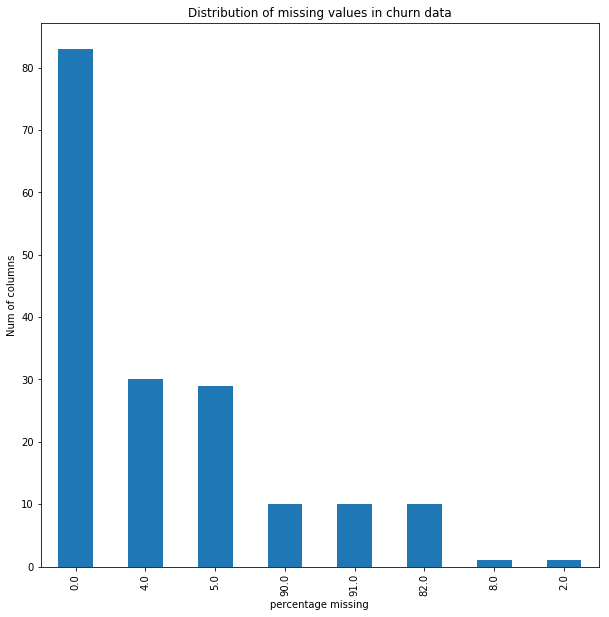

In [14]:
s = df[df.churn==1].isnull().sum()*100/df[df.churn==1].shape[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
round(s).value_counts().plot(kind='bar')
plt.xlabel('percentage missing')
plt.ylabel('Num of columns')
plt.title('Distribution of missing values in churn data')
plt.show()

#### Columns with more than 70% missing data for churn customers will be dropped

In [15]:
df_churn = df[df.churn==1]
# Columns with more than 70% missing data afor churn customers will be dropped
cols_drop = list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)
list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [16]:
df.drop(cols_drop,axis=1,inplace=True)

Check missing values again

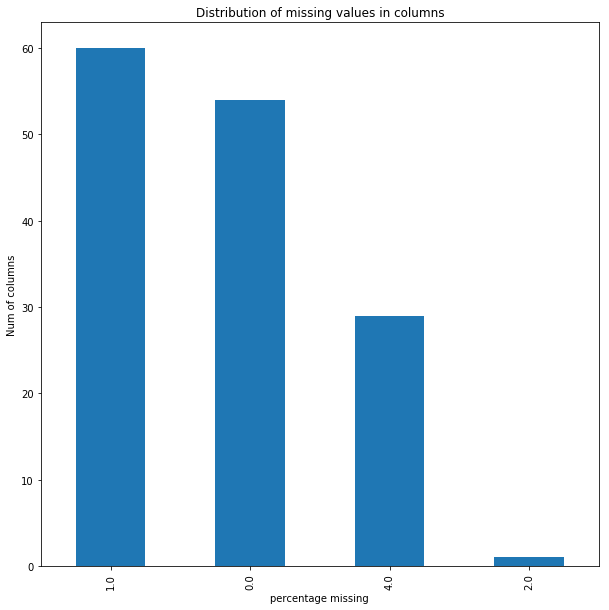

In [17]:
s = df.isnull().sum()*100/df.shape[0]

plt.figure(figsize=(10,10))
round(s).value_counts().plot(kind='bar')
plt.xlabel('percentage missing')
plt.ylabel('Num of columns')
plt.title('Distribution of missing values in columns')
plt.show()

#### Rmove the rows with missing values :-

In [18]:
df=df[df.isnull().sum(axis=1)==0]

(df.isnull().sum()*100/df.shape[0]).unique().tolist()

[0.0]

### Derive new features for predicting churn:-

1.  Combining june and july month data as good phase using mean
2.  Then we can drop original june and juy month columns

In [19]:
# First drop unnecessary columns
df.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
        'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis=1,inplace=True)

In [20]:
df.shape

(28334, 133)

### Measuring the average decrease in usage values between good and churn phase for both categories of customers:-

The expectation is that customers who churn will have more drastic reduction in usage over T network between good and churn phases as compared to non-churn customers.

In [21]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase,churn
6,0.0,0.0,0.0,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,1857.99,1427.04,1896.43,248.64,336.96,265.28,20.24,22.69,2.51,2126.89,1786.71,2164.23,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,0.0,0.0,0.0,1.39,0.76,2.60,2128.41,1788.06,2167.11,0.00,0.0,0.0,0.00,0.00,0.00,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,610.0,0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1975.0,0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,738.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,10

#### Below columns are  all 0s, so we can drop them

In [22]:
df.drop(list(df[df.columns].sum()[df[df.columns].sum()==0].index),axis=1,inplace=True)

In [23]:
df.shape

(28334, 124)

### Column data distibution
The columns are not distributed Normally as clearly visible in the distribution plots:

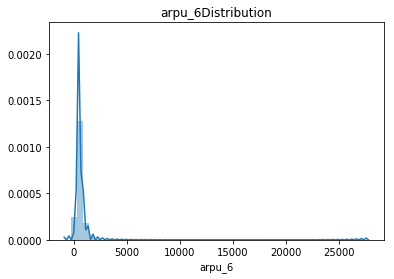

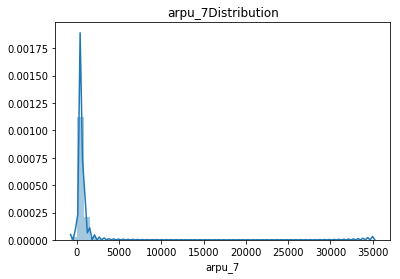

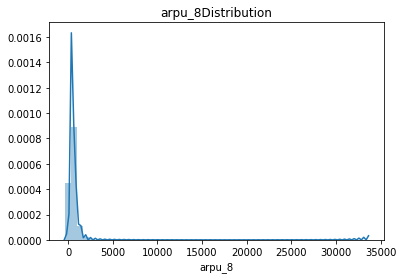

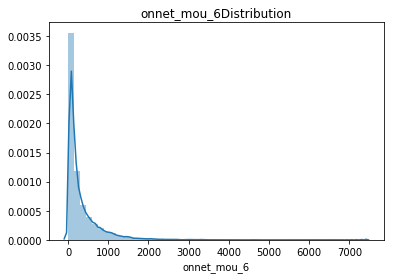

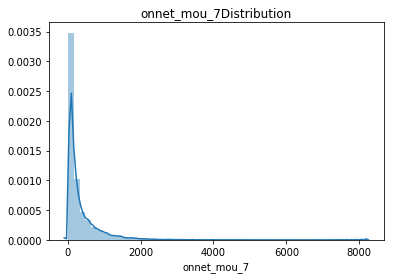

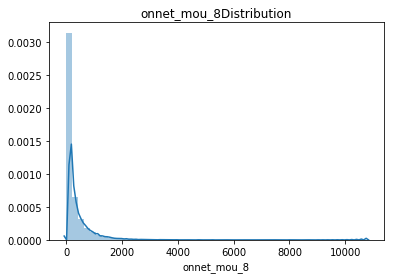

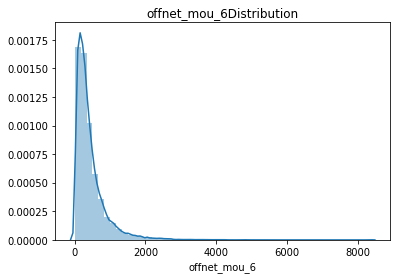

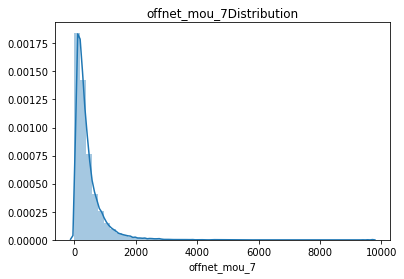

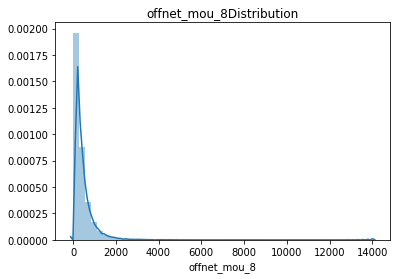

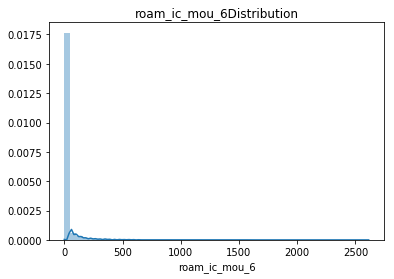

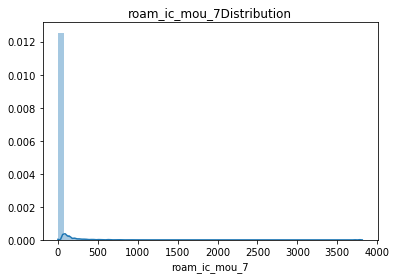

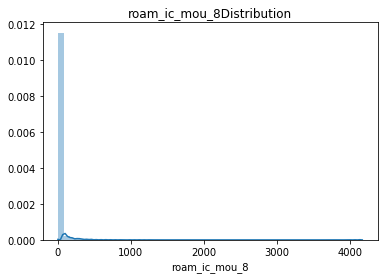

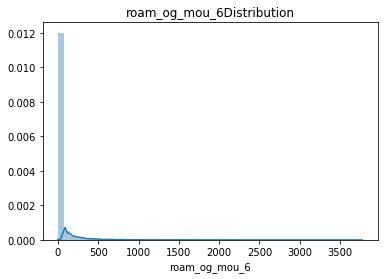

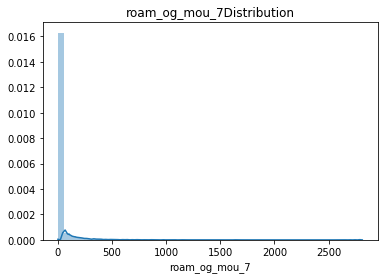

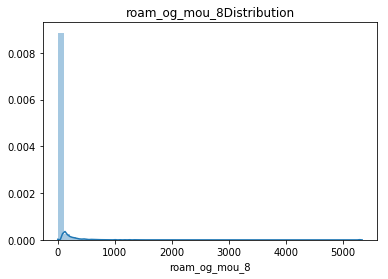

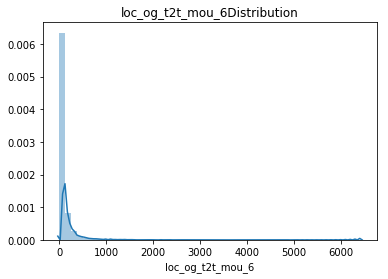

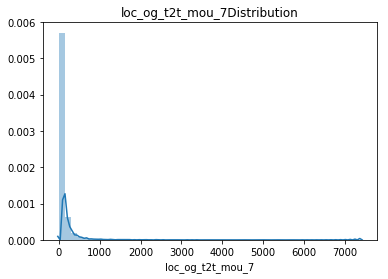

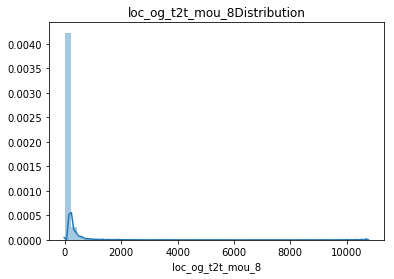

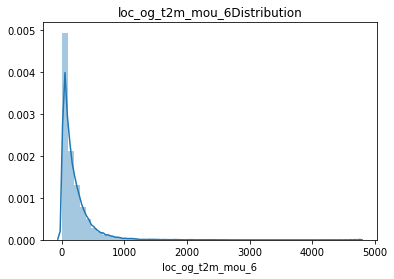

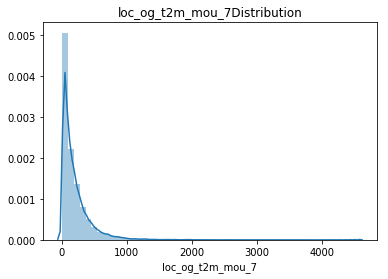

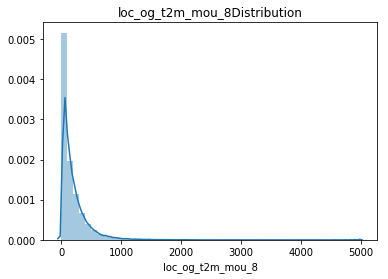

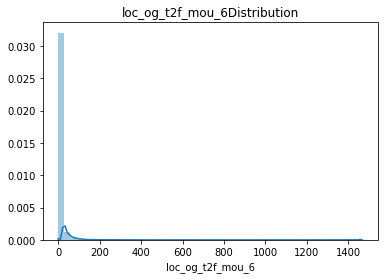

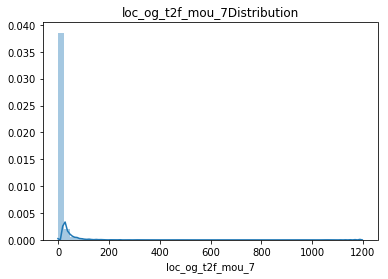

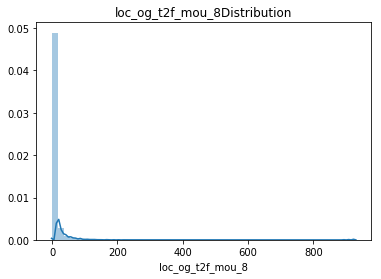

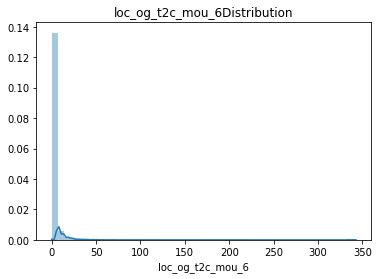

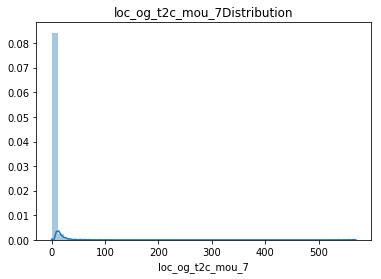

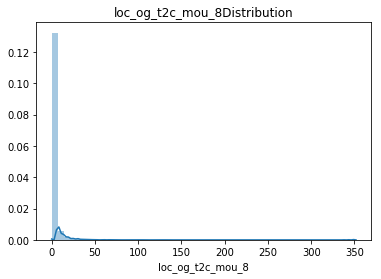

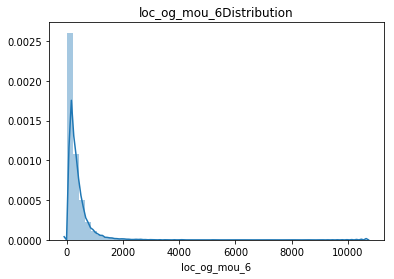

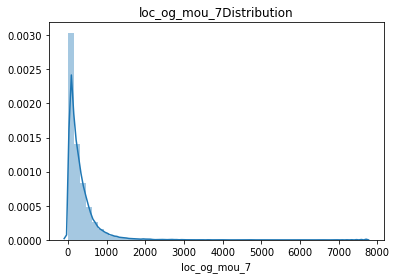

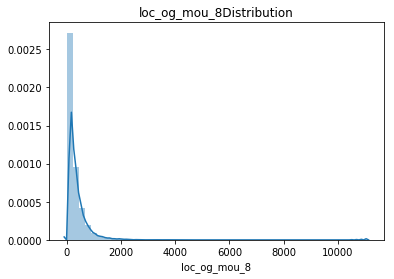

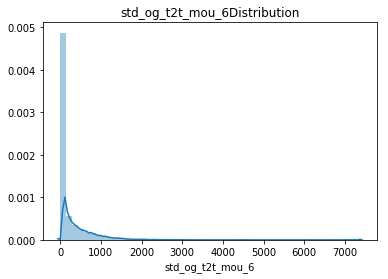

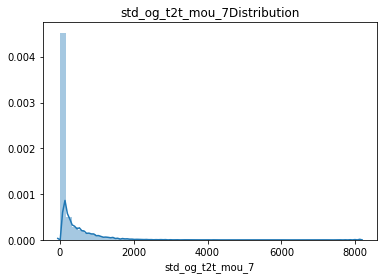

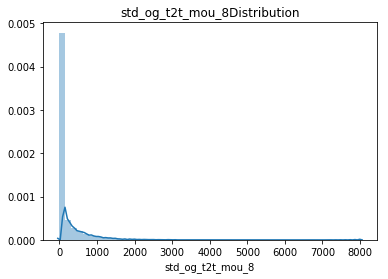

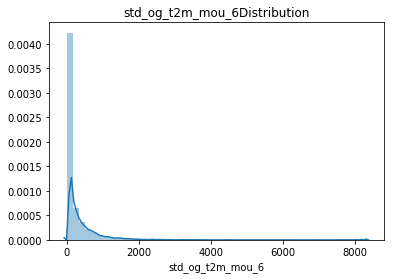

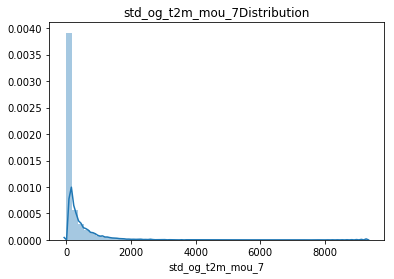

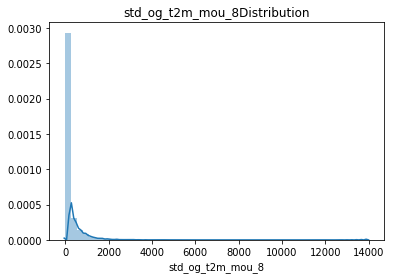

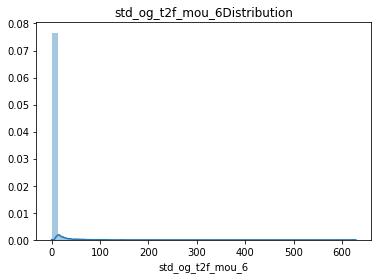

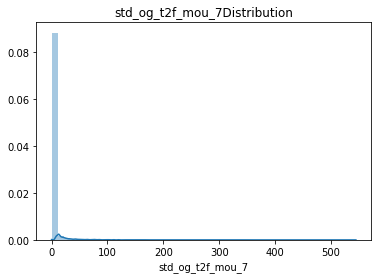

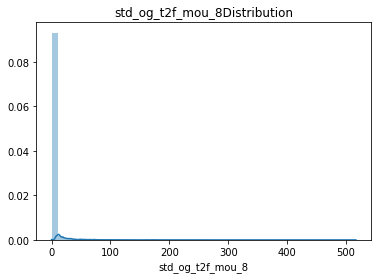

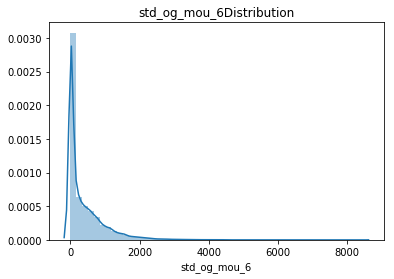

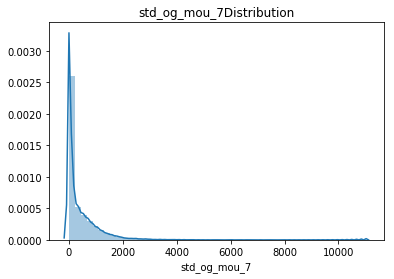

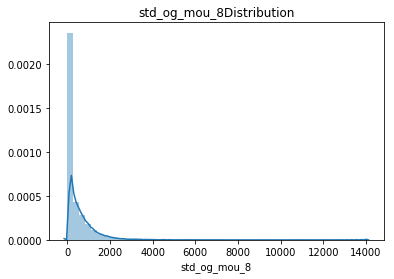

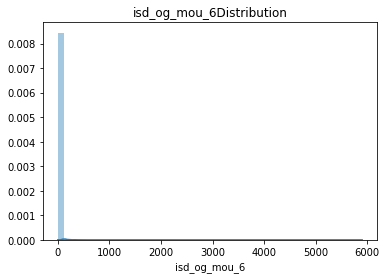

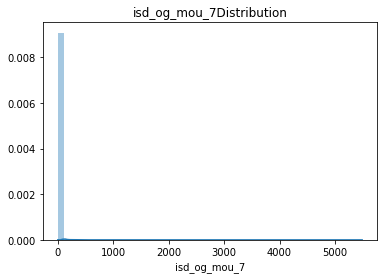

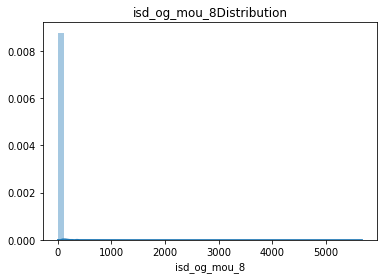

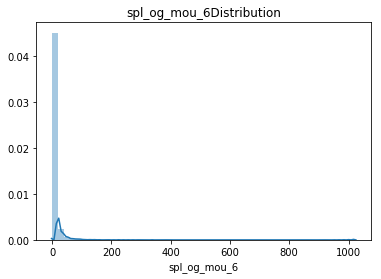

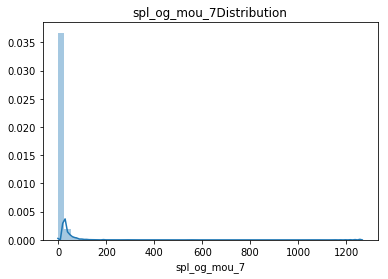

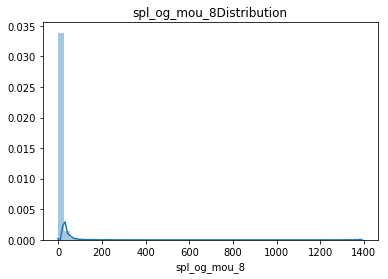

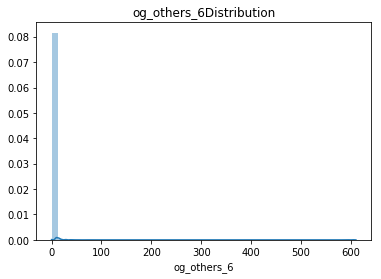

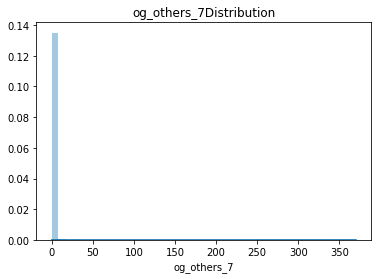

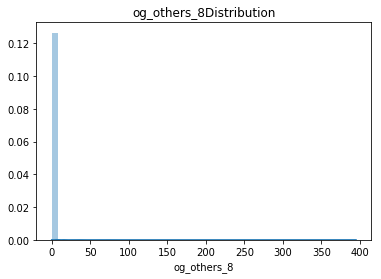

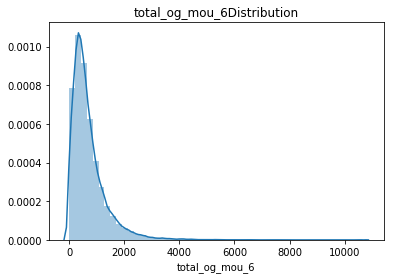

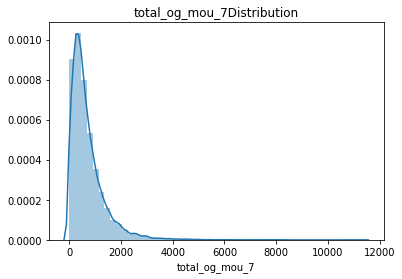

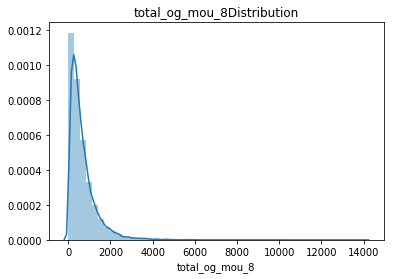

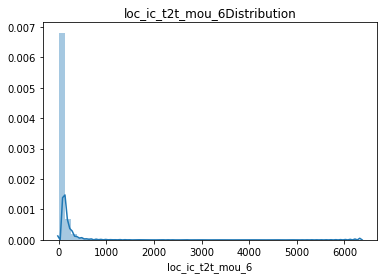

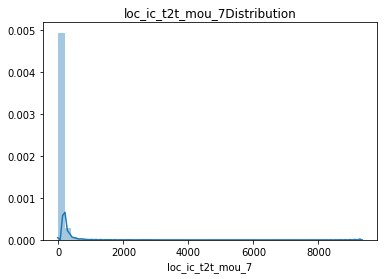

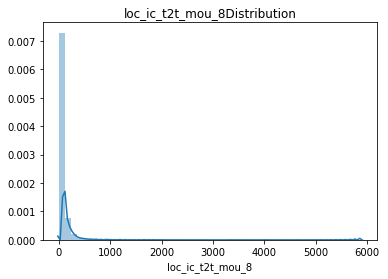

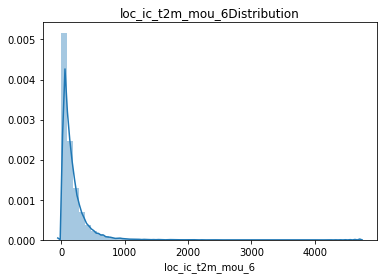

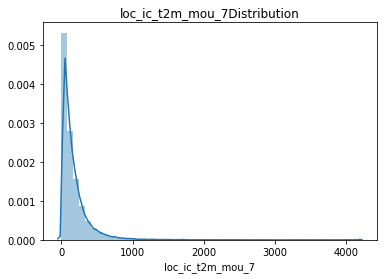

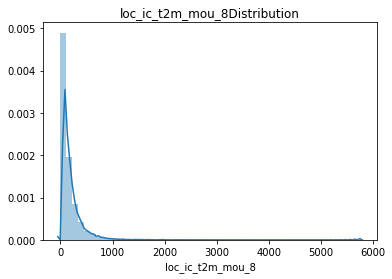

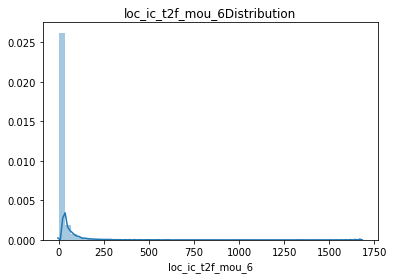

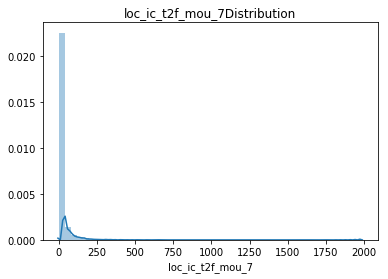

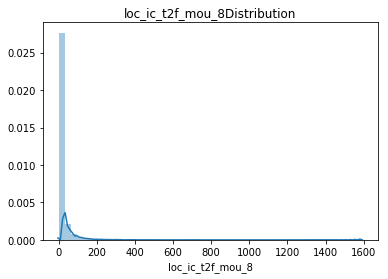

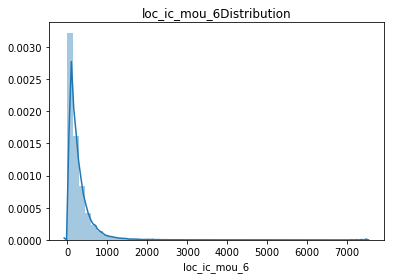

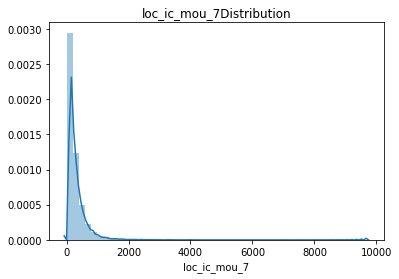

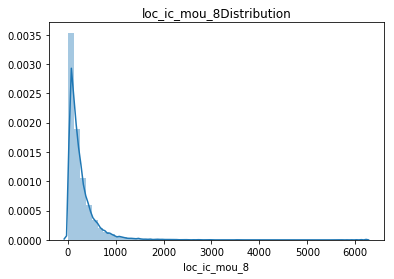

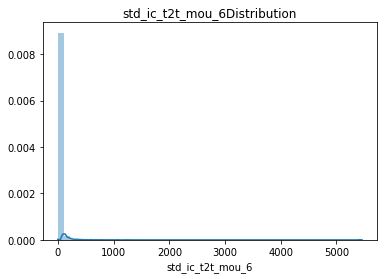

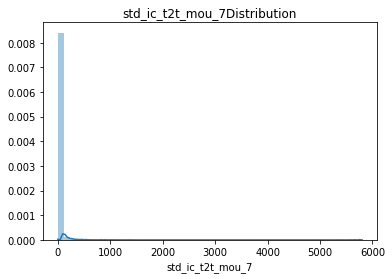

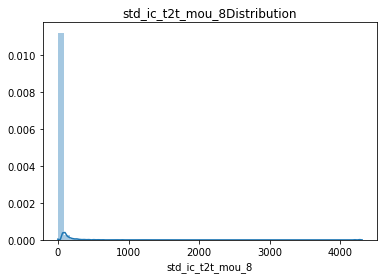

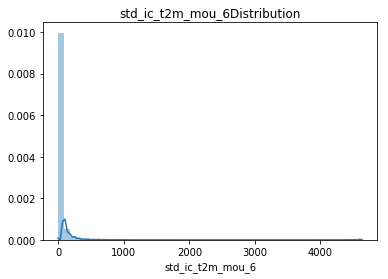

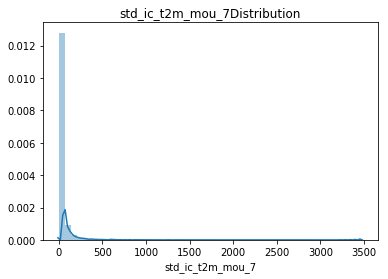

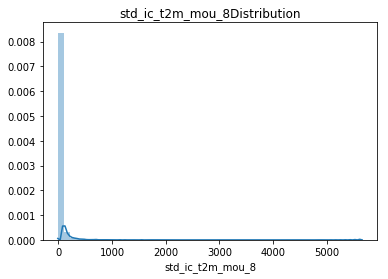

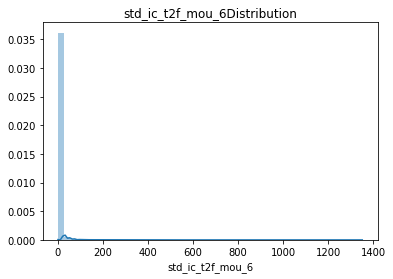

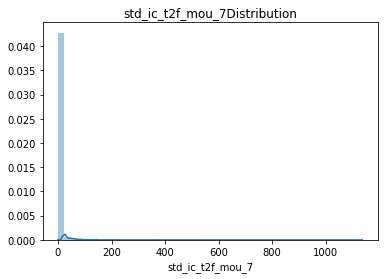

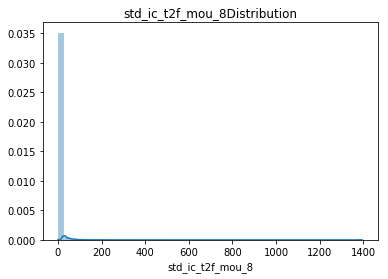

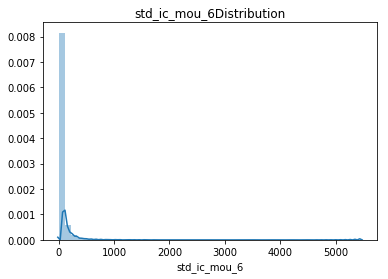

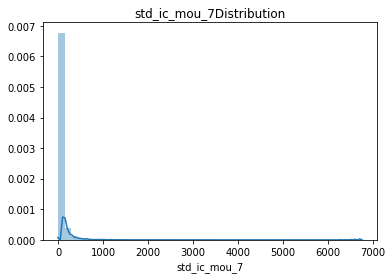

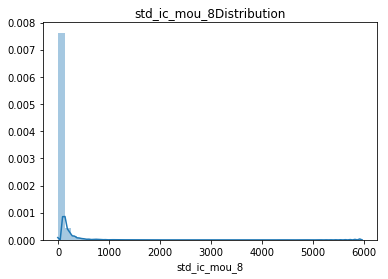

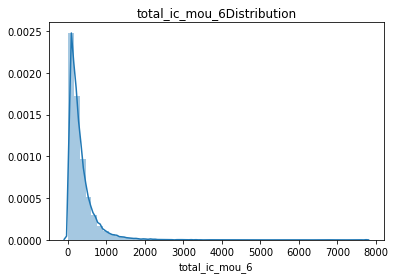

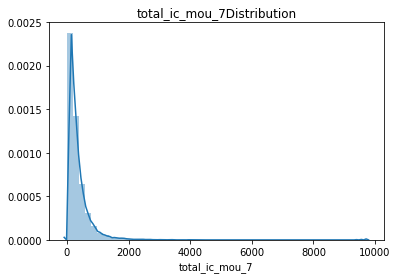

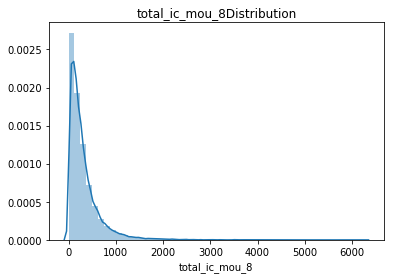

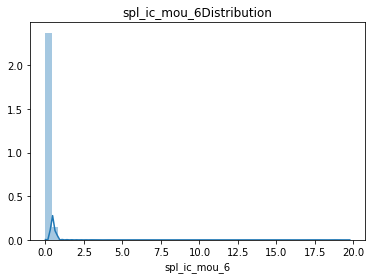

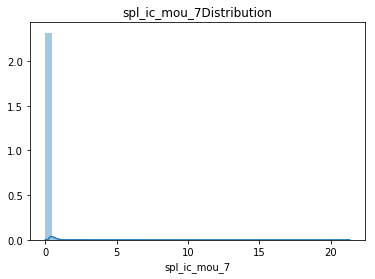

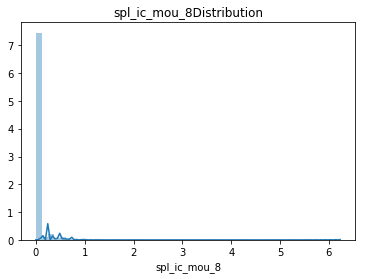

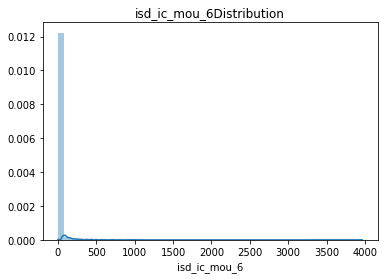

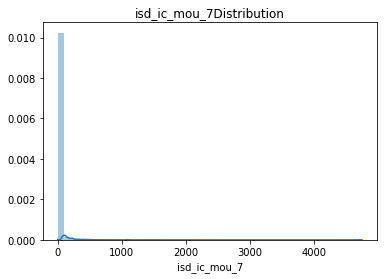

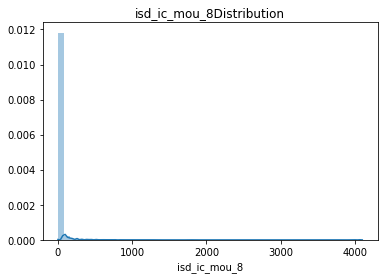

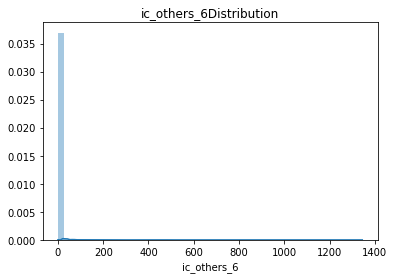

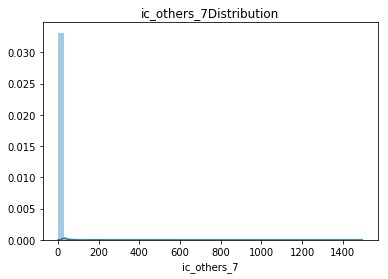

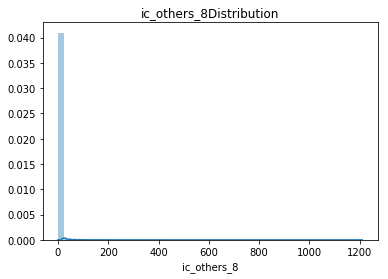

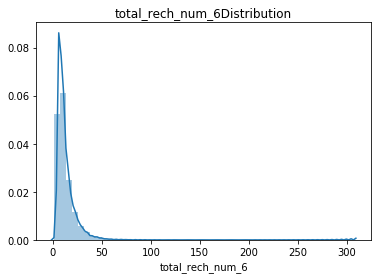

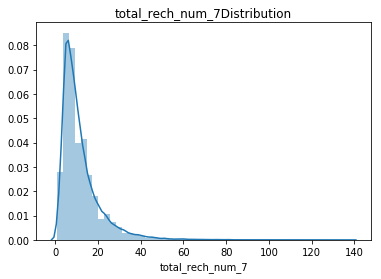

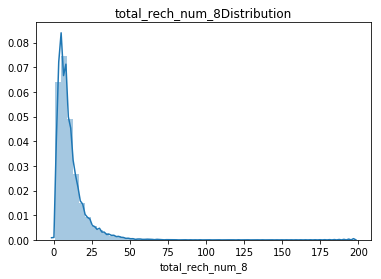

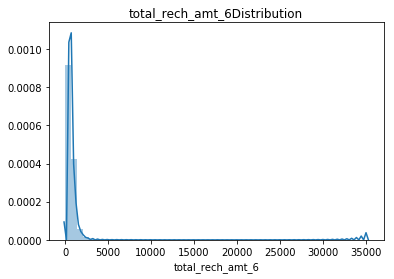

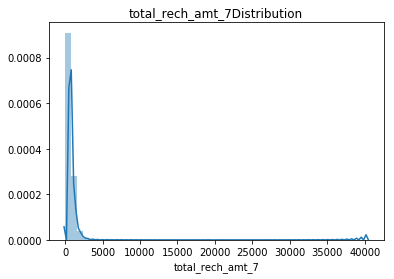

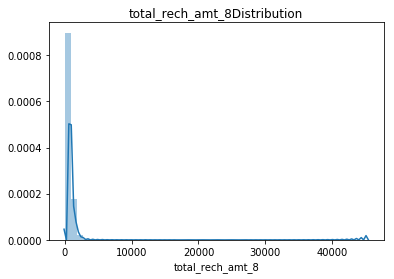

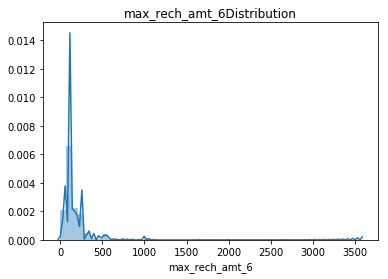

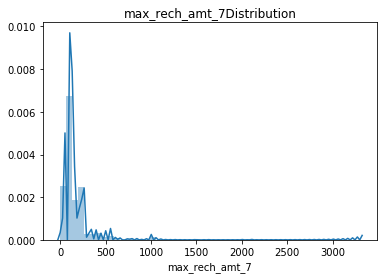

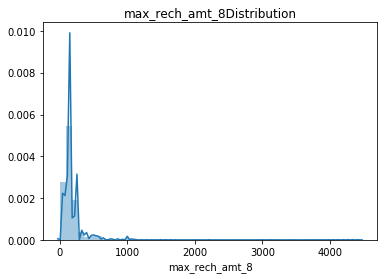

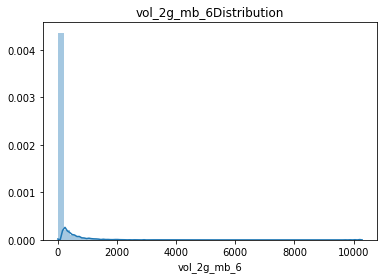

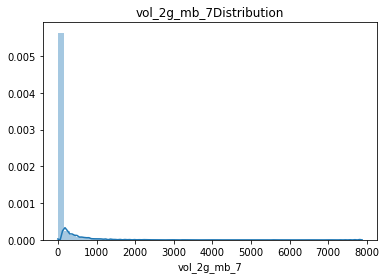

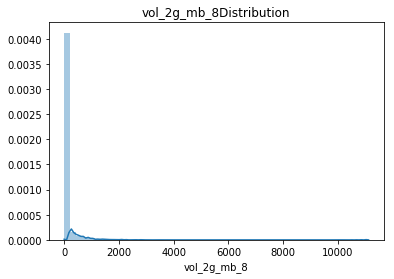

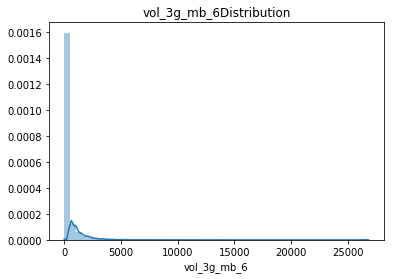

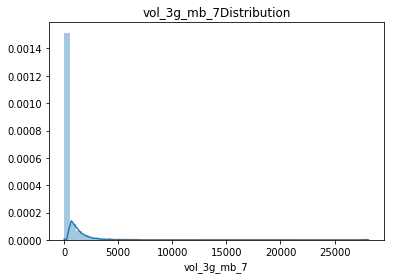

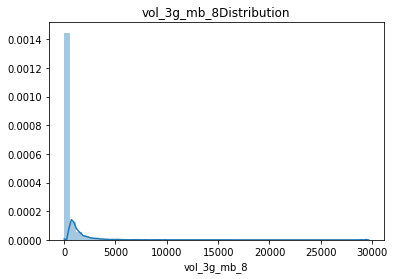

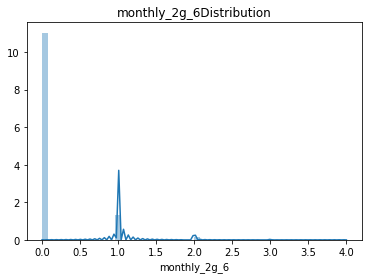

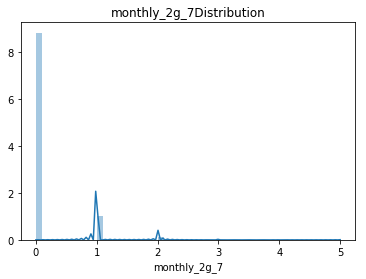

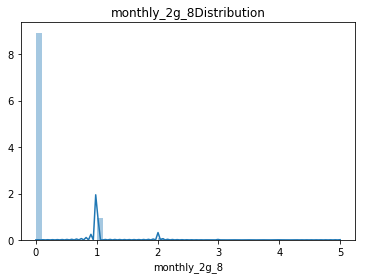

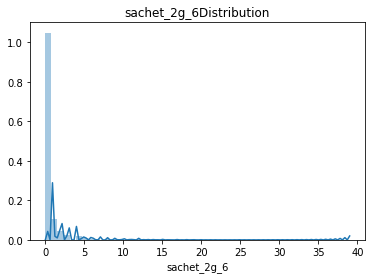

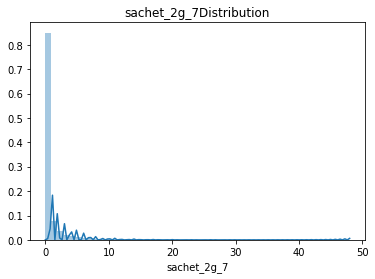

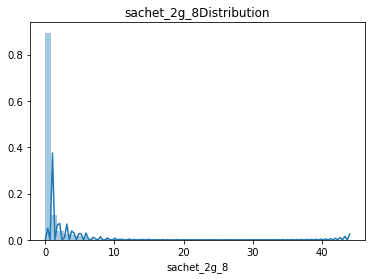

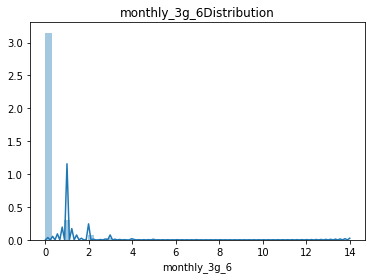

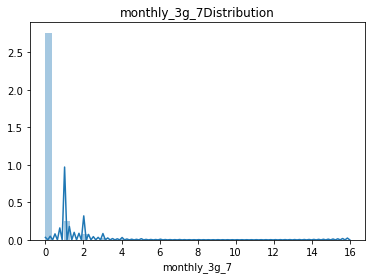

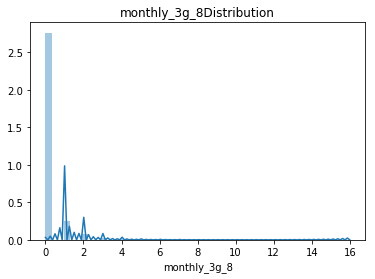

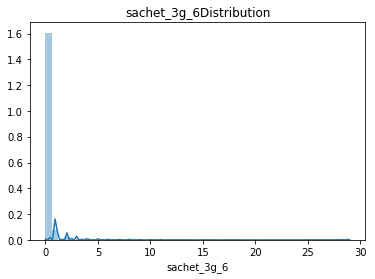

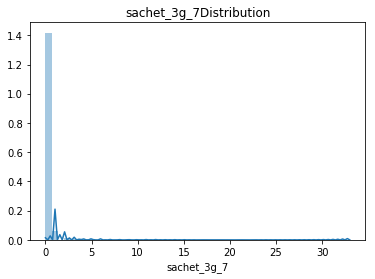

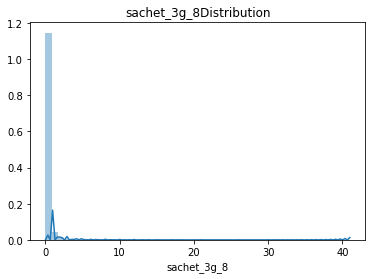

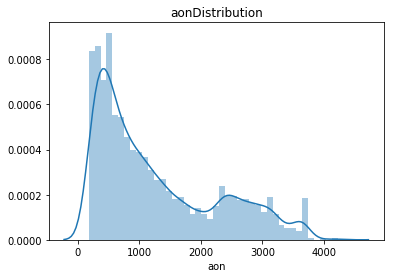

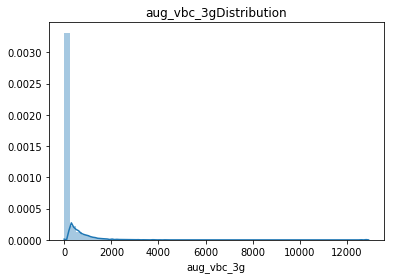

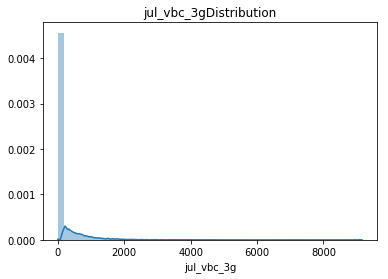

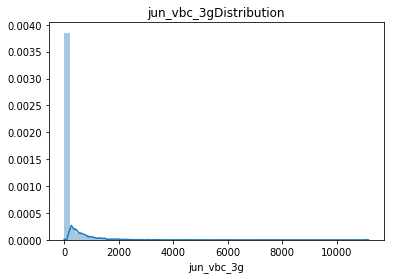

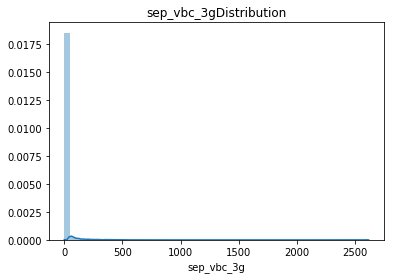

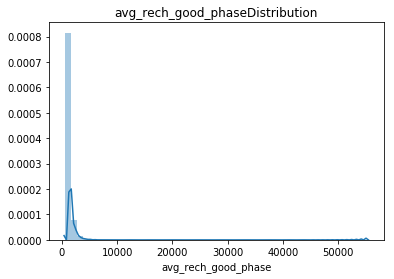

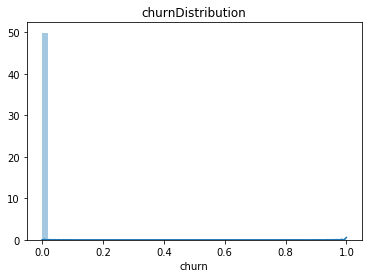

In [24]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for col in list(df.columns):
    
    plt.figure()
    plt.title(col + 'Distribution')
    sns.distplot((df[col]))
    plt.show()

### Train Test Split

In [25]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase,churn
6,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,1857.99,1427.04,1896.43,248.64,336.96,265.28,20.24,22.69,2.51,2126.89,1786.71,2164.23,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,1.39,0.76,2.60,2128.41,1788.06,2167.11,0.00,0.0,0.0,0.00,0.00,0.00,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1673,0.00,0.00,0.00,0.0,610.0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1975.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,738.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.0,0.0

In [26]:
from sklearn.model_selection import train_test_split
Y = df.pop('churn')
X = df

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_res, Y_res = sm.fit_resample(X, Y)

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.3,stratify = Y_res,random_state=100)

In [29]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('Y_train shape',Y_train.shape)
print('Y_test shape',Y_test.shape)

X_train shape (39561, 123)
X_test shape (16955, 123)
Y_train shape (39561,)
Y_test shape (16955,)


In [30]:
print(sum(Y_train==0))
print(sum(Y_train==1))
print(sum(Y_test==0))
print(sum(Y_test==1))

19780
19781
8478
8477


### Scaling the Data before PCA

In [31]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### PCA:-

Finding the optimal number of components first

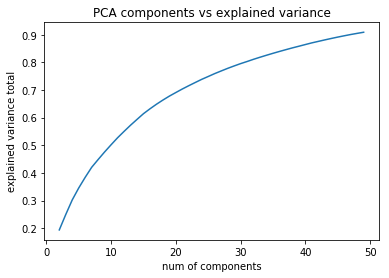

In [32]:
from sklearn.decomposition import PCA
import numpy as np
variance = []
for num_components in range(2,50):
    #print('Aplying PCA with',num_components,'components:')
    pca = PCA(n_components=num_components)
    pca.fit(X_train)
    #print('explained variance ratio:',np.sum(pca.explained_variance_ratio_))
    variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure()
plt.plot(range(2,50),variance)
plt.xlabel('num of components')
plt.ylabel('explained variance total')
plt.title('PCA components vs explained variance')
plt.show()


About 90% variance is explained by 40 components

In [33]:
pca = PCA(n_components=49)
pca.fit(X_train)
y_train = Y_train

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print('Explained variance:',np.sum(pca.explained_variance_ratio_))

Explained variance: 0.9087307362258482


### Fitting Models:-

1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def auc_score(y_true,y_pred):
    return roc_auc_score(y_true,y_pred)

score = make_scorer(auc_score, greater_is_better=True)
param_grid={'C':[0.006,0.009,0.09],'penalty':['l1','l2'],'class_weight':['balanced']}
grid_search = GridSearchCV(LogisticRegression(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator LogisticRegression(C=0.09, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
best score 0.885365419195754


In [35]:
print('Test score for best Logistic Regression estimator:-',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Logistic Regression estimator:- 0.931549540973768


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[6925, 1553],
       [ 421, 8056]], dtype=int64)

In [37]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      8478
           1       0.84      0.95      0.89      8477

    accuracy                           0.88     16955
   macro avg       0.89      0.88      0.88     16955
weighted avg       0.89      0.88      0.88     16955



2. Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

param_grid={'max_depth':[5,10,20,None],'max_features':['sqrt','log2',None],'class_weight':['balanced']}
grid_search = GridSearchCV(DecisionTreeClassifier(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best score 0.9823308120606337


In [39]:
print('Test score for best Decision Tree estimator',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Decision Tree estimator 0.9834272638648135


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8259,  219],
       [  62, 8415]], dtype=int64)

In [41]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8478
           1       0.97      0.99      0.98      8477

    accuracy                           0.98     16955
   macro avg       0.98      0.98      0.98     16955
weighted avg       0.98      0.98      0.98     16955



3. Gradient Boosting Classifier :-

In [42]:
from sklearn.ensemble import AdaBoostClassifier

clf=AdaBoostClassifier()
clf.fit(X_train,Y_train)
print(roc_auc_score(Y_train,clf.predict_proba(X_train)[:,1]))

0.9599895907712199


In [43]:
print('Test score for best Random forest estimator',roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1]))

Test score for best Random forest estimator 0.9558482045543326


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,clf.predict(X_test))
#confusion_matrix(Y_train,clf.predict(X_train))

array([[7335, 1143],
       [ 608, 7869]], dtype=int64)

In [45]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8478
           1       0.97      0.99      0.98      8477

    accuracy                           0.98     16955
   macro avg       0.98      0.98      0.98     16955
weighted avg       0.98      0.98      0.98     16955



### Feature selection

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

              Feature      Score
80     total_ic_mou_8  36.825087
65       loc_ic_mou_8  33.618394
59   loc_ic_t2m_mou_8  27.367169
79     total_ic_mou_7  24.763566
64       loc_ic_mou_7  23.311845
2              arpu_8  18.670669
63       loc_ic_mou_6  18.386324
78     total_ic_mou_6  17.812721
117               aon  16.370339
58   loc_ic_t2m_mou_7  16.367272
95   total_rech_amt_8  14.421693
57   loc_ic_t2m_mou_6  12.775541
20   loc_og_t2m_mou_8  11.555426
56   loc_ic_t2t_mou_8  11.050980
30   std_og_t2t_mou_6   9.313670
29       loc_og_mou_8   9.285906
55   loc_ic_t2t_mou_7   9.078416
92   total_rech_num_8   8.452334
8        offnet_mou_8   8.182598
62   loc_ic_t2f_mou_8   8.018547


In [73]:
X_new = X[list(featureScores.nlargest(20,'Score').Feature)]

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_new, Y_new = sm.fit_resample(X, Y)

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y_new,test_size=0.3,stratify = Y_new,random_state=100)

#### ExtraTreesClassifier for Feature Selection

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = ExtraTreesClassifier( criterion='gini')

forest.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [91]:
print('Train Score:')
print(roc_auc_score(Y_train,forest.predict_proba(X_train)[:,1]))
print('Test Score:')
print(roc_auc_score(Y_test,forest.predict_proba(X_test)[:,1]))

Train Score:
1.0
Test Score:
0.9999893554859446


In [92]:
confusion_matrix(Y_test,forest.predict(X_test))

array([[8449,   29],
       [   4, 8473]], dtype=int64)

In [93]:
print(classification_report(Y_test, forest.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8478
           1       1.00      1.00      1.00      8477

    accuracy                           1.00     16955
   macro avg       1.00      1.00      1.00     16955
weighted avg       1.00      1.00      1.00     16955



### Plot the feature importances

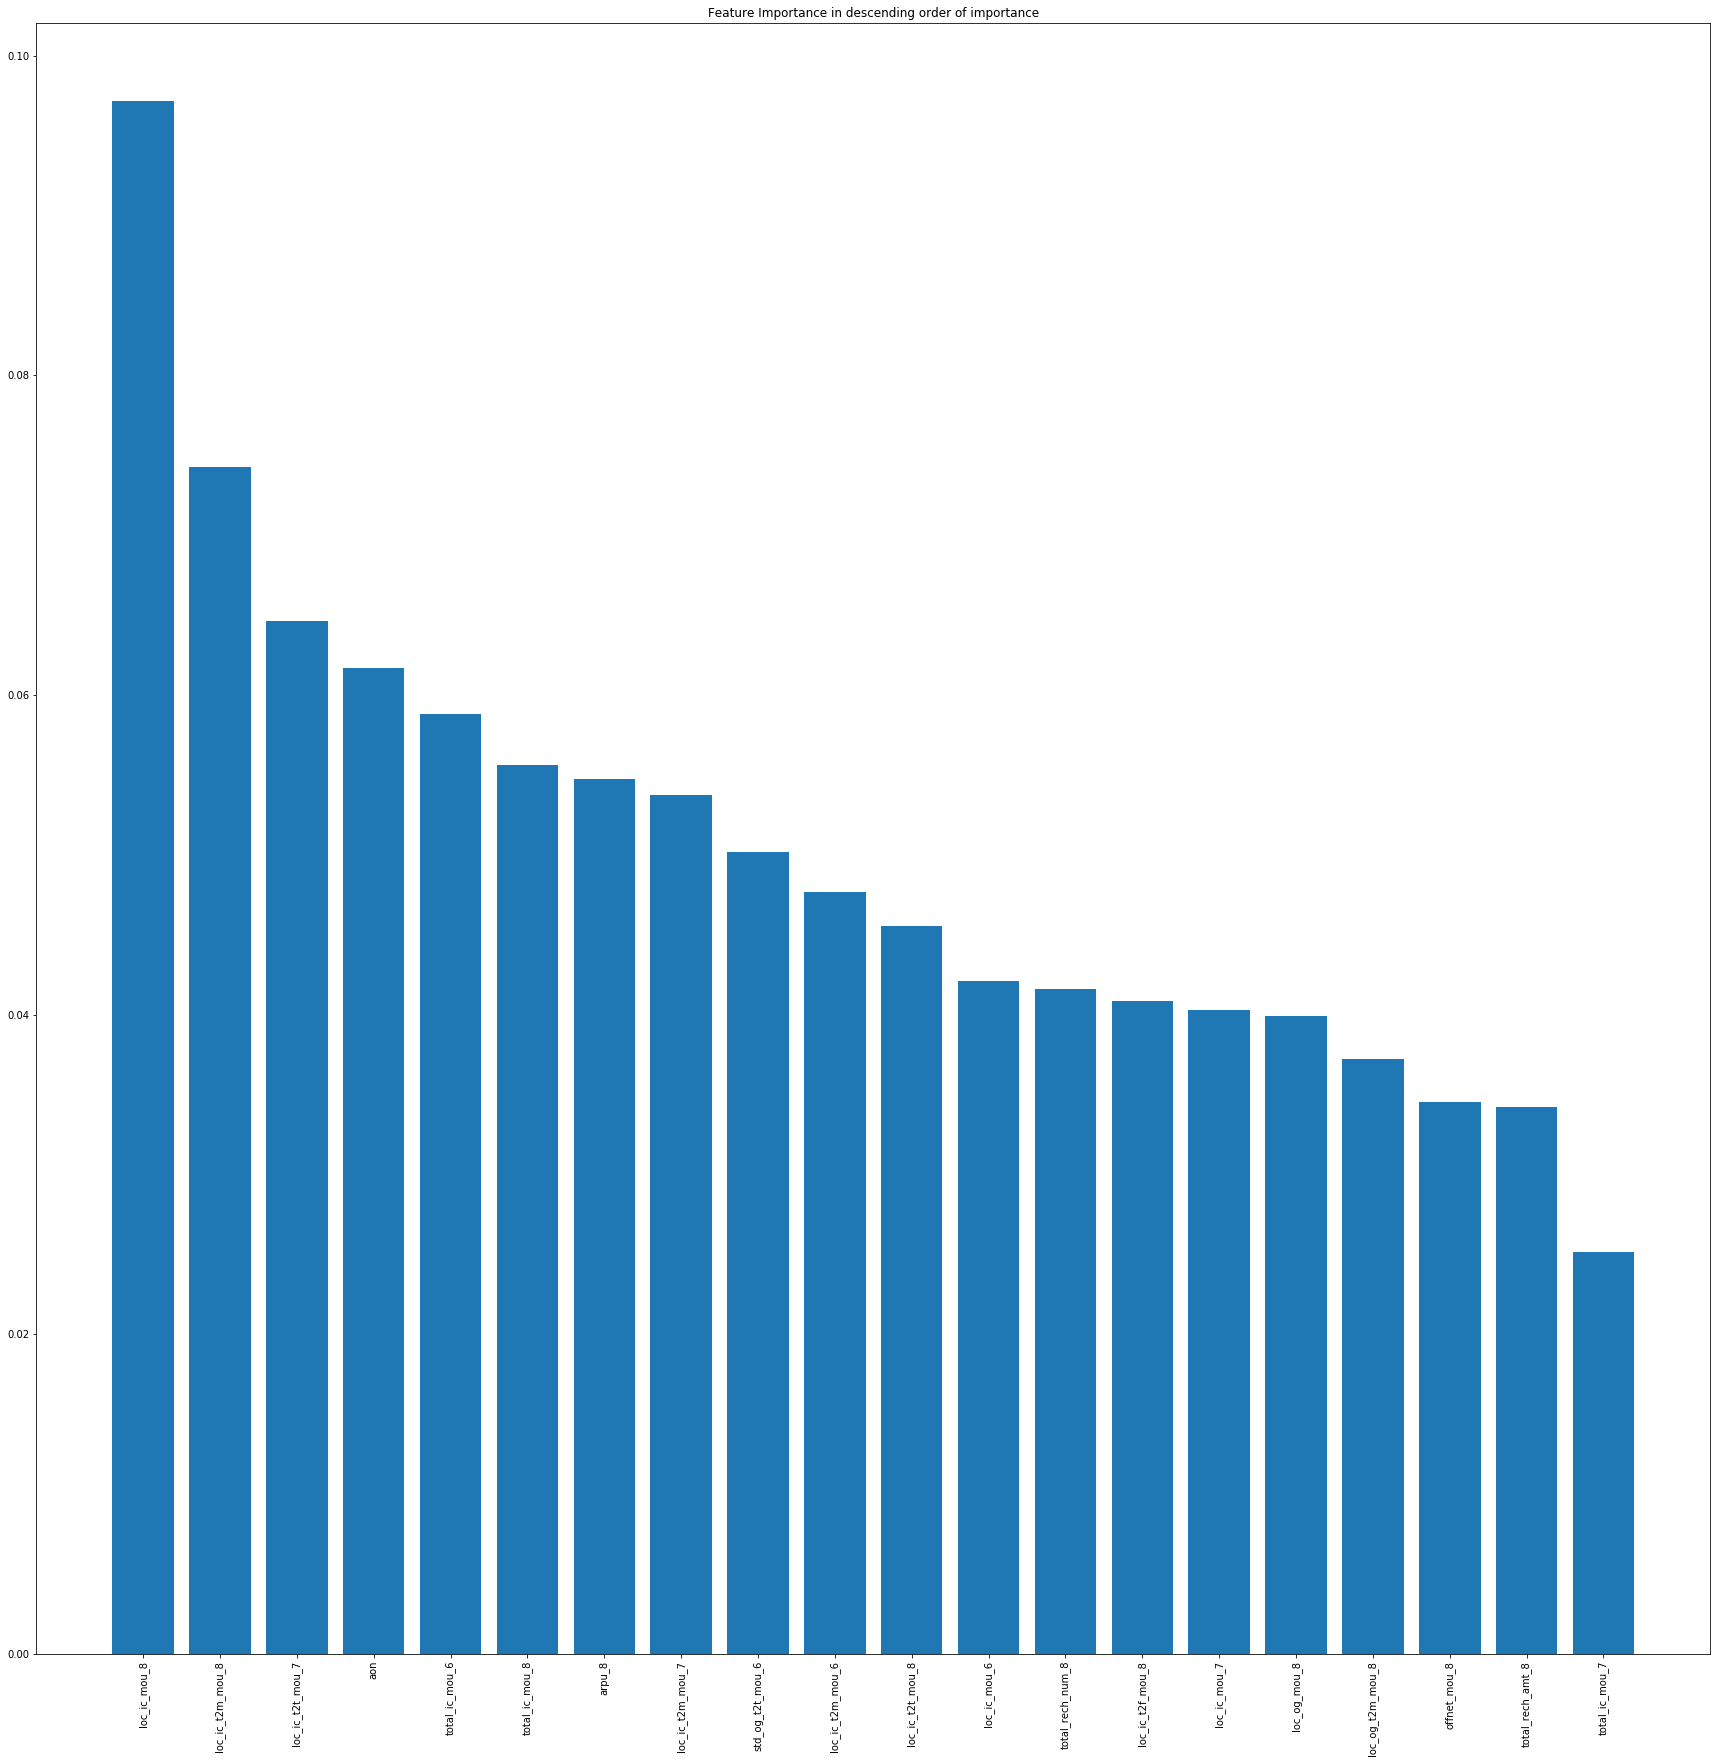

In [94]:
importances = forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(30, 30))

# Create plot title
plt.title("Feature Importance in descending order of importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()